<a href="https://colab.research.google.com/github/7ZXU/AI/blob/main/HandsOnCh1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

케라스 주로 이용
텐서플로 위에서 케라스 굴러감
따라서 텐서플로 공부 필요 

# Tensorflow 2.0 시작하기
colab에서는 이미 Tensorflow 라이브러리 설치되있기에 추가 설치 필요없음


In [ ]:
pip install tensorflow

In [ ]:
#라이브러리 import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tf.__version__
#버전 확인 습관 들이기! .__version__

'2.4.1'

In [ ]:
a=tf.constant(5, name='input_a') #상수생성 #tf.constant(값, name='변수이름')
b=tf.constant(3, name='input_b')


In [ ]:
c=tf.multiply(a,b, name='mul_c')
d=tf.add(a,b, name='add_d')
e=tf.subtract(a,b, name='sub_e')

In [ ]:
tf.print(c) #값만 보고 싶다면 #tf.print

15


In [ ]:
c

<tf.Tensor: shape=(), dtype=int32, numpy=15>

#텐서 정의

In [ ]:
list = [[1, 2, 3], [4, 5, 6]]
array = np.array([1, 4, 6])

x = tf.convert_to_tensor(2) #int 
x1 = tf.convert_to_tensor(list) #list 
x2 = tf.convert_to_tensor(array) #array

In [ ]:
tf.print(x)

2


In [ ]:
tf.print(x1)

[[1 2 3]
 [4 5 6]]


In [ ]:
tf.print(x2)

[1 4 6]


#난수 생성 및 텐서플로 자료형의 다양한 출력
난수 생성은 가중치 초기화와 직접적 연관이 있으므로, 신경망 구성을 *저수준으로 하게 된다면 필수적으로 알아야 하는 기능입니다

*저수준 : 가중치(w)값을 수작업으로 입력하는 것과 같은 수준

In [ ]:
rand = tf.random.uniform([1], 0, 1)
#([생성갯수], 최솟값, 최댓값) 랜덤 균일 분포

In [ ]:
tf.print(rand)
print(rand)
rand

[0.396946907]
tf.Tensor([0.3969469], shape=(1,), dtype=float32)


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.3969469], dtype=float32)>

In [ ]:

rand = tf.random.normal([1], 0, 1)
#([생성갯수], 평균, 표준편차) 랜덤 정규 분포

In [ ]:
tf.print(rand)
print(rand)
rand

[0.0857512578]
tf.Tensor([0.08575126], shape=(1,), dtype=float32)


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.08575126], dtype=float32)>

# tf.random.uniform vs tf.normal.normal (by seaborn)

In [ ]:
output1 = tf.random.uniform([50000], 0, 1)
output2 = tf.random.normal([50000], 0, 1)

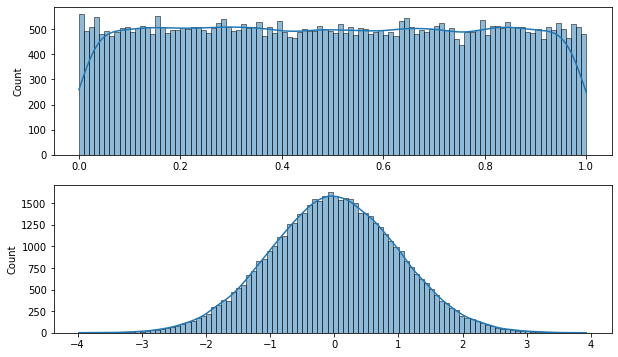

In [ ]:
plt.figure(figsize = (10,6)) #배경 사이즈 #(가로, 세로)
plt.subplot(211) 
#plt.subplot(row,col,pos) 
#그래프 여러개 그릴 때, 그래프 위치 지정 
#콤마 생략 가능
sns.histplot(output1, bins=100, kde=True)
#########################
#bins = 100 뭐지? 변량값 100개?
#########################
plt.subplot(212)
sns.histplot(output2, bins=100, kde=True)
plt.show()

matplotlib 그래프 그리기

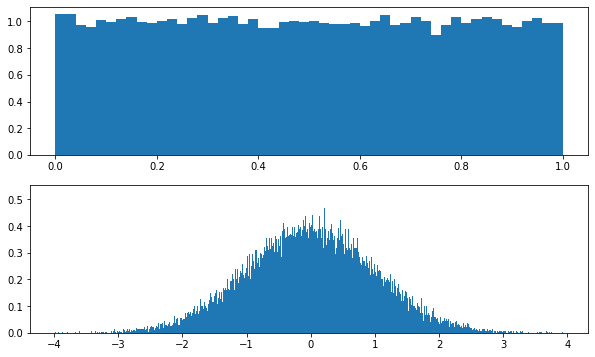

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.hist(output1, bins=50, density=True)
#bins #몇개의 영역으로 쪼갤것인지
#density #밀도함수로 바꿔 막대 아래 면적 1됨
plt.subplot(212)
plt.hist(output2, bins=1000, density=True)
plt.show()
#####################################
#선 나오는 것 해결 못함

간단한 신경망 학습

In [ ]:
import math
def sigmoid(x):
    return 1/(1+np.exp(-x))
def ReLU(x):
    return np.maximum(x,0)
    #ReLU는 국민 activation function

In [ ]:
input = np.linspace(-10, 10, 1000)
#np.linspace(start, stop, num)
#start이상 stop이하에서 num 개수만큼의 수를 만들어라

In [ ]:
result = sigmoid(input)

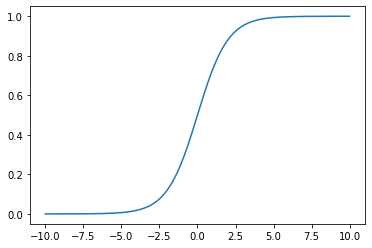

In [ ]:
plt.plot(input, result)
plt.show()

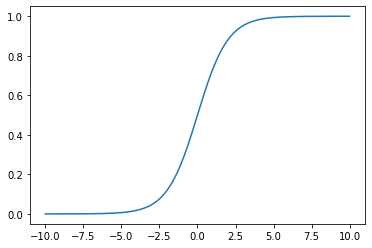

In [ ]:
plt.plot(input, ReLU(result))
plt.show()
#ReLU(x):x<0이면 x=0으로 변형, x>0이면 그대로 사용 
#result>0 이기에 그래프 그대로 나옴

In [ ]:
#간단한 신경망
x=1 #입력값
y=0 #목표값
w=tf.random.normal([1],0,1) #가중치생성
output=sigmoid(x*w) #wx
print(output)
output=ReLU(output) #n=활성화함수(wx+b)
print(output)
#####################################
#sigmoid relu 함께쓰는 이유?

[0.25418666]
[0.25418666]


In [ ]:
x=1
y=0
w=tf.random.normal([1],0,1)
a=0.1 #learning rate(학습률)
for i in range(1000): #학습
    output=sigmoid(x*w)
    err=y-output #오차
    w=w+a*err*x #경사하강법
    if i%100==99:
        print(i, err, output)

99 [-0.10772666] [0.10772666]
199 [-0.05386272] [0.05386272]
299 [-0.0355226] [0.0355226]
399 [-0.02641298] [0.02641298]
499 [-0.02099234] [0.02099234]
599 [-0.01740501] [0.01740501]
699 [-0.01485841] [0.01485841]
799 [-0.01295842] [0.01295842]
899 [-0.01148711] [0.01148711]
999 [-0.01031455] [0.01031455]


#다차원 텐서곱
텐서플로에서는 정보 주고 받는 모든 형태가 텐서
벡터, 행렬 모두 일반화 하면 텐서 취급

In [ ]:
x=[[2,]]

In [ ]:
m=tf.matmul(x,x) #tf.matmul #행렬곱
print('hello, {}'.format(m))

hello, [[4]]


In [ ]:
a=tf.constant([[1,2], [3, 4]])
print(a)
tf.print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
[[1 2]
 [3 4]]


In [ ]:
m=tf.matmul(a,a) #tf.matmul #행렬곱
tf.print(m)

[[7 10]
 [15 22]]


In [ ]:
#브로드캐스팅
#텐서에 1을 더한다는 것은 말이 안됨
b=tf.add(a,1)
tf.print(b)
print(b)

[[2 3]
 [4 5]]
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [ ]:
print(a*b) 
#matmul 없이도 행렬곱 가능
#numpy처럼 사용하기

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [ ]:
c=np.multiply(a, b)
c
#tensor->numpy변환

array([[ 2,  6],
       [12, 20]], dtype=int32)

In [ ]:
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
a.numpy()
#tensor a -> numpy 변환

array([[1, 2],
       [3, 4]], dtype=int32)

#Gradient Tape(자동 미분) : 편미분

In [ ]:
w=tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w*w

grad = tape.gradient(loss, w) 
#편미분
#tf.GradientTape.gradient()
#loss에 w가 얼마나 기여하는지 계산

#loss=w^2
#loss편미분=2w

print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [ ]:
x=tf.constant(3.0)
y=tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x) #관심있게 보겠다 #tensor 추적
    ###########################################
    #watch 꼭 필요한건가? 없으면 None 뜨긴함

    g.watch(y)

    z0=x**2
    z1=y**2
dz_dy = g.gradient(z1,y) #y에 대한 편미분
dz_dx = g.gradient(z0,x) #x에 대한 편미분

print(dz_dy)
print(dz_dx)

del g #persistent 삭제

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
#차원을 reduce하는 tf연산
tf.print(a)
print(tf.reduce_sum(a)) #합으로 차원 줄이기
tf.print(tf.reduce_mean(a)) #평균으로 차원 줄이기

[[1 2]
 [3 4]]
tf.Tensor(10, shape=(), dtype=int32)
2


In [ ]:
#tf.ones()
x=tf.ones((2, 2)) 
#tf.ones(n, m)
#n*m array 반환
#dtype=float32
#1. 채움
tf.print(x)

[[1 1]
 [1 1]]


In [ ]:
with tf.GradientTape(persistent=True) as t :
    t.watch(x)
    y=tf.reduce_sum(x)
    z=tf.multiply(y, y)
    tf.print(y)
    tf.print(z)

4
16


In [ ]:
dz_dy = t.gradient(z, y)
dz_dy

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
dz_dx = t.gradient(z, x)
dz_dx
#########################################
#편미분 식 꼭 물어보기!!!

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8., 8.],
       [8., 8.]], dtype=float32)>

In [ ]:
x=tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y=x*x
    z=y*x*z + 3
    w=x+1999999

dy_dx=t.gradient(y,x) #2x
dz_dx=t.gradient(z,x) #yz
dw_dx=t.gradient(w,x) #1
del t


In [ ]:
print(dy_dx)
tf.print(dy_dx)
dy_dx.numpy()

tf.Tensor(6.0, shape=(), dtype=float32)
6


6.0

In [ ]:
print(dz_dx)
tf.print(dz_dx)
dz_dx.numpy()

tf.Tensor(432.0, shape=(), dtype=float32)
432


432.0

In [ ]:
print(dw_dx)
tf.print(dw_dx)
dw_dx.numpy()

tf.Tensor(1.0, shape=(), dtype=float32)
1


1.0

#tf.Data API

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
#tesor를 잘라서 dataset 안으로 넣어줌
dataset
#dataset 사용 목적
#데이터를 편하게 확인하기 위해서

<TensorSliceDataset shapes: (), types: tf.int32>

In [ ]:
#dataset 안의 내용 확인하는 방법
#for문 사용
for i in dataset:
    print(i.numpy())

8
3
0
8
2
1


In [ ]:
it = iter(dataset) #반복자 생성

In [ ]:
print(next(it).numpy()) 
#next(it) 
#다음 dataset값 반환 
#마지막 도달하면 에러

8


In [ ]:
dataset.reduce(3, lambda state, value:state+value).numpy()

25

In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4,10]))
#uniform 균일하게 만들기 
#matrix #행 열 깊이
#4개의 배치로 자름 

In [ ]:
print(dataset1)
dataset1

<TensorSliceDataset shapes: (10,), types: tf.float32>


<TensorSliceDataset shapes: (10,), types: tf.float32>

In [ ]:
dataset1.element_spec #구성 예쁘게 보기

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]), 
    tf.random.uniform([4,100])))
dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.float32)>

In [ ]:
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.float32, name=None))

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
#zip #dataset 합치기 

In [ ]:
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.float32, name=None)))

In [ ]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0,0],[1,2]], values=[1,2],dense_shape=[3,4]))

In [ ]:
for elem in dataset4 : 
    print(elem)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [ ]:
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

In [ ]:
np.set_printoptions(precision=3) #소수점아래자리자르기

In [ ]:
for z in dataset1 : 
    print(z.numpy())

#from_tensors_slices() #4개의 배치로 자른 dataset 불러오기

[0.788 0.394 0.906 0.279 0.394 0.908 0.596 0.674 0.122 0.249]
[0.692 0.277 0.638 0.781 0.966 0.677 0.119 0.713 0.715 0.851]
[0.262 0.126 0.43  0.877 0.884 0.766 0.695 0.985 0.692 0.725]
[0.395 0.734 0.748 0.208 0.758 0.495 0.474 0.193 0.319 0.267]


In [ ]:
iterator=dataset1.as_numpy_iterator()
list(iterator)

TypeError: ignored

In [ ]:
for i in range(4):
    print(list(dataset1.as_numpy_iterator())[i])

TypeError: ignored

In [ ]:
dataset =tf.data.Dataset.from_tensor_slices([[1,2],[3,4]])
list(dataset.as_numpy_iterator())


TypeError: ignored

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([[1,2,3],[1,2,4],[4,5,6]])
list(dataset.as_numpy_iterator())

TypeError: ignored

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(([[1,2,3],[1,2,4]))
list(dataset.as_numpy_iterator())

SyntaxError: ignored

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices({'a':[1,2],'b':[3,4]})
list(dataset.as_numpy_iterator())

TypeError: ignored

#Feature Lable 붙여보기

In [ ]:
features= tf.constant([[1,3],[2,1],[3,3]])
labels = tf.constant(['A','B','A'])
dataset = tf.data.Dataset.from_tensor_slices((features,labels))
dataset
#합치는 방법1 #from_tensor_slices활용

<TensorSliceDataset shapes: ((2,), ()), types: (tf.int32, tf.string)>

In [ ]:
features_dataset = tf.data.Dataset.from_tensor_slices(features)
labels_dataset = tf.data.Dataset.from_tensor_slices(labels)
dataset = tf.data.Dataset.zip((features_dataset, labels_dataset))
dataset
#합치는 방법2 #두 데이터 모두 dataset으로 묶어져 있다면 -> zip으로 묶기
#tesnsorflow에서는 dataset으로 바꿔주는 것이 좋음

<ZipDataset shapes: ((2,), ()), types: (tf.int32, tf.string)>

In [ ]:
batched_features = tf.data.Dataset.from_tensor_slices([[[1,2],[3,4]],[[3,4],[1,5]],[[3,5],[3,6]]])
#2*2행렬


In [ ]:
batched_labels = tf.data.Dataset.from_tensor_slices([['A','B'],['A','A'],['B','A']])

In [ ]:
list(batched_features.as_numpy_iterator())

TypeError: ignored

In [ ]:
list(batched_labels.as_numpy_iterator())

TypeError: ignored

In [ ]:
batched_data = tf.data.Dataset.zip((batched_features,batched_labels))
####################################
#왜 라벨로 바꿔준다음에 zip하는거지?

In [ ]:
for elem in batched_data.as_numpy_iterator():
    print(elem)
    #feature + label = batch
    #batch모음 -> dataset

(array([[1, 2],
       [3, 4]], dtype=int32), array([b'A', b'B'], dtype=object))
(array([[3, 4],
       [1, 5]], dtype=int32), array([b'A', b'A'], dtype=object))
(array([[3, 5],
       [3, 6]], dtype=int32), array([b'B', b'A'], dtype=object))


#And 네트워크 구현

In [ ]:
import numpy as np
import tensorflow as tf

x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[1],[0],[0],[0]])
w=tf.random.normal([2],0,1)
b=tf.random.normal([1],0,1)
b_x=1
learning_rate=0.1

for i in range(2000):
    error_sum=0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        err = y[j][0] - output
        w=w+err*learning_rate*x[j]
        b=b+b_x*learning_rate*err
        error_sum +=err

        if i%200 == 199:
            print(i, error_sum)

199 [0.262]
199 [0.079]
199 [-0.101]
199 [-0.116]
399 [0.157]
399 [0.046]
399 [-0.065]
399 [-0.068]
599 [0.111]
599 [0.032]
599 [-0.047]
599 [-0.048]
799 [0.086]
799 [0.025]
799 [-0.036]
799 [-0.037]
999 [0.07]
999 [0.02]
999 [-0.03]
999 [-0.03]
1199 [0.058]
1199 [0.017]
1199 [-0.025]
1199 [-0.025]
1399 [0.05]
1399 [0.014]
1399 [-0.021]
1399 [-0.022]
1599 [0.044]
1599 [0.013]
1599 [-0.019]
1599 [-0.019]
1799 [0.039]
1799 [0.011]
1799 [-0.017]
1799 [-0.017]
1999 [0.035]
1999 [0.01]
1999 [-0.015]
1999 [-0.015]


In [ ]:
for i in range(4):
    print('X:',x[i],'Y:',y[i],'Output=',sigmoid(np.sum(x[i]*w)+b_x*b))
    ###########################
    #b_x왜 곱하는거지?


X: [1 1] Y: [1] Output= [0.965]
X: [1 0] Y: [0] Output= [0.025]
X: [0 1] Y: [0] Output= [0.025]
X: [0 0] Y: [0] Output= [2.452e-05]


In [ ]:
tf.print(w)
tf.print(b)
#w > b
#[1 1]이면 w모든 요소와 곱해져 더해짐
#값이 커지면 sigmoid 1가까운 값 반환

[6.95789385 6.96104908]
[-10.6159945]


#XOR 네트워크 구현

In [ ]:
import numpy as np
import tensorflow as tf

x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[0],[1],[1],[0]]) #값이 다를 때만 1반환 #XOR
w=tf.random.normal([2],0,1)
b=tf.random.normal([1],0,1)
b_x=1
learning_rate=0.1

for i in range(2000):
    error_sum=0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        err = y[j][0] - output
        w=w+err*learning_rate*x[j]
        b=b+b_x*learning_rate*err #####################b_x대체 왜 곱하는거?
        error_sum +=err

    if i%200 == 199:
        print(i, error_sum)

199 [0.002]
399 [9.99e-05]
599 [3.994e-06]
799 [1.788e-07]
999 [0.]
1199 [0.]
1399 [0.]
1599 [0.]
1799 [0.]
1999 [0.]


In [ ]:
for i in range(4):
    print('X:',x[i],'Y:',y[i],'Output = ', sigmoid(np.sum(x[i]*w)+b_x*b))

X: [1 1] Y: [0] Output =  [0.513]
X: [1 0] Y: [1] Output =  [0.513]
X: [0 1] Y: [1] Output =  [0.5]
X: [0 0] Y: [0] Output =  [0.5]


In [ ]:
tf.print(w)
tf.print(b)
#w, b값이 줄어듦

[0.0512818918 1.34110451e-07]
[-1.67638063e-07]


왜 단층 신경망은 XOR 네트워크를 학습할 수 없을까?

#3.1 MNIST